<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#First-Insight-into-the-Titanic-Dataset" data-toc-modified-id="First-Insight-into-the-Titanic-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>First Insight into the Titanic Dataset</a></span><ul class="toc-item"><li><span><a href="#Answer-Some-Questions" data-toc-modified-id="Answer-Some-Questions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Answer Some Questions</a></span></li></ul></li><li><span><a href="#Visualization-with-Seaborn" data-toc-modified-id="Visualization-with-Seaborn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualization with Seaborn</a></span><ul class="toc-item"><li><span><a href="#Inspect-Raw-Features" data-toc-modified-id="Inspect-Raw-Features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inspect Raw Features</a></span></li><li><span><a href="#Survival-Inspection" data-toc-modified-id="Survival-Inspection-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Survival Inspection</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation Matrix</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## First Insight into the Titanic Dataset

In [2]:
#sns.get_dataset_names()

- First insights, deal with missing values
- Answer some questions

In [3]:
df = pd.read_csv('datafiles/titanic.csv')
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#explanation of header files.
header = pd.read_csv('datafiles/titanic_headers.csv')
header

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


- Notice that there are missing values in age, deck and embarked town
- Why some fares=0?

In [6]:
df.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [8]:
#drop the cabin number
df.drop(columns='cabin',inplace=True)

#fill the NAs of 'age' with median 
df['age'] = df['age'].fillna(df['age'].median())

#replace missing embark with the most frequent category
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [9]:
df.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [10]:
#dont drop the ticket number. same ticket numbers belong to the same group, maybe they survive better...
#df.drop(columns='ticket',inplace=True)

In [11]:
df.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
embarked     object
dtype: object

In [12]:
#convert survived and pclass to string
df['survived'] = df['survived'].astype(str)
df['pclass'] = df['pclass'].astype(str)

### Answer Some Questions

- (1) How many did not pay for tickets? Who are they?
- (2) How many people survived? Which percantage? male vs female? 
- (3) Who are the youngest and oldest survivors? 
- (4) What are the numbers in classes?

In [13]:
#(1)
df[df['fare']==0]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
179,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S
277,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,S
302,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S
413,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,S
466,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,S
481,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,S
597,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S
633,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,S


Mr Thomas Andrews Jr was a nephew of Lord Pirrie, principal owner of Harland & Wolff (the builders of the Titanic). He boarded with a complimentary ticket №112050.

Mr William Henry Marsh Parr was a managing electrical engineer and chosen to oversee the smooth running of the Titanic’s maiden voyage.

Mr Johan Vilhelm Henrik Törnqvist and his fellow American Line employees (William Cahoone Johnson Jr., Alfred Johnson, Lionel Leonard) were given third class accommodation aboard their Titanic to make the trip back to New York (ticket number 370160) where they could resume work.

In [14]:
#(2)
print(df['survived'].value_counts(normalize=True))
print(df['survived'].value_counts())

0    0.616162
1    0.383838
Name: survived, dtype: float64
0    549
1    342
Name: survived, dtype: int64


In [15]:
#survival rate is very high among females
df_survived_gender = df.groupby(['sex'])['survived']
print(df_survived_gender.value_counts())
print("===============================")
print(df_survived_gender.value_counts(normalize=True))

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: survived, dtype: int64
sex     survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: survived, dtype: float64


In [16]:
df_survived_class = df.groupby(['pclass'])['survived']
print(df_survived_class.value_counts())
print('============================================')
print(df_survived_class.value_counts(normalize=True))

pclass  survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64
pclass  survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: survived, dtype: float64


In [17]:
#(3)
#oldest
print(df.iloc[df['age'][df['survived']=='1'].idxmax()])

print('================================================')

#yougest
print(df.iloc[df['age'][df['survived']=='1'].idxmin()])

survived                                       1
pclass                                         1
name        Barkworth, Mr. Algernon Henry Wilson
sex                                         male
age                                         80.0
sibsp                                          0
parch                                          0
ticket                                     27042
fare                                        30.0
embarked                                       S
Name: 630, dtype: object
survived                                  1
pclass                                    3
name        Thomas, Master. Assad Alexander
sex                                    male
age                                    0.42
sibsp                                     0
parch                                     1
ticket                                 2625
fare                                 8.5167
embarked                                  C
Name: 803, dtype: object


**Does traveling with a group save you?**

In [18]:
#people having the same ticket number
groups_counts = df['ticket'].value_counts()
print(groups_counts)

#get the ticket numbers purchased by 4 or more people.We can assume they know each other.
groups_gd4 =  groups_counts[groups_counts>4].index
print(groups_gd4)

#boolen series of those ticket numbers
bool_ticket_number = df['ticket'].isin(groups_gd4)

#display the survival rates. Look 90% of those could not survive!
df[bool_ticket_number]['survived'].value_counts(normalize=True)

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: ticket, Length: 681, dtype: int64
Index(['347082', 'CA. 2343', '1601', '3101295', 'CA 2144', '347088',
       'S.O.C. 14879', '382652'],
      dtype='object')


0    0.897959
1    0.102041
Name: survived, dtype: float64

## Visualization with Seaborn

### Inspect Raw Features

- A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within disrete bins. It is way more useful than count plot for percentage.
- multiple: {“layer”, “dodge”, “stack”, “fill”} Approach to resolving multiple elements when semantic mapping creates subsets. Only relevant with univariate data. Partition into hues
- stat: Aggregate statistic to compute in each bin. percent: normalize such that bar heights sum to 100 in each category. Notice that the sum of each bar adds up to 100%. 
- shrink: number Scale the width of each bar relative to the binwidth by this factor. Only relevant with univariate data.
- common_norm{bool}: If True and using a normalized statistic, the normalization will apply over the full dataset. Otherwise, normalize each histogram independently.

- Age vs Gender, Class Counts,  

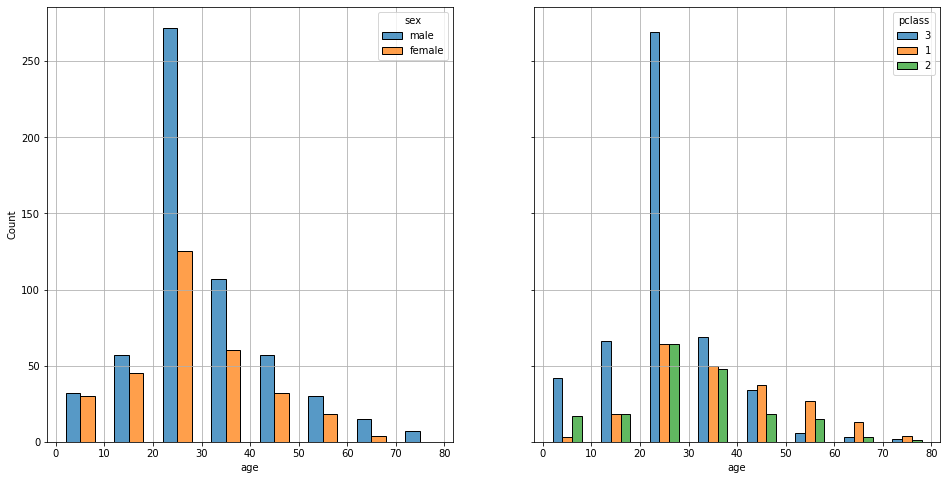

In [19]:
fig,ax = plt.subplots(1,2,figsize = (16,8),sharey = True)

sns.histplot(data = df, x = 'age',hue = 'sex',multiple = "dodge",bins=8, binrange=[0,80],
             shrink=0.6,ax=ax[0])

# sns.histplot(x=df['age'],hue=df['sex'],multiple="dodge",bins=8, binrange=[0,80],
#              shrink=0.6,ax=ax[1], stat='percent',common_norm = False)
sns.histplot(data = df, x = 'age',hue = 'pclass',multiple = "dodge", bins=8, binrange=[0,80],
             shrink = 0.6,ax = ax[1])

#plt.suptitle('Age Distribution Counts/Percantages with Sex')
ax[0].grid()
ax[1].grid()
plt.show()

- Why does it appear that Quensland travelers are all young people?  

<AxesSubplot:xlabel='embarked', ylabel='age'>

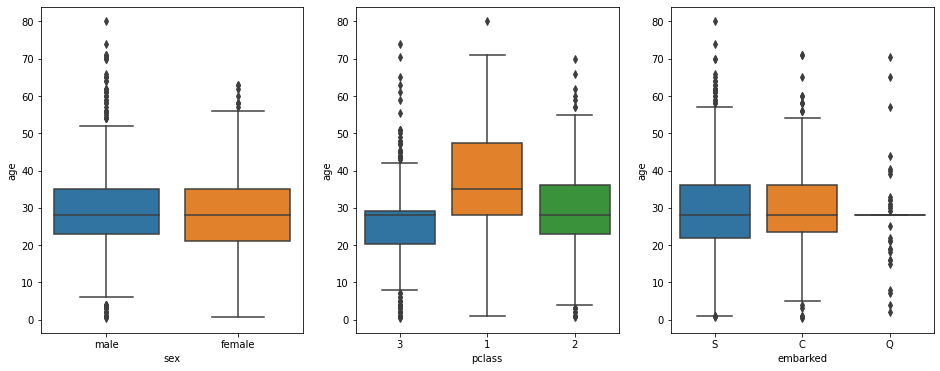

In [20]:
fig,ax = plt.subplots(1,3,figsize=(16,6))
sns.boxplot(data = df, x ='sex',y = 'age',ax = ax[0])
sns.boxplot(data = df, x ='pclass',y = 'age',ax = ax[1])
sns.boxplot(data = df, x ='embarked',y = 'age',ax = ax[2])

<AxesSubplot:xlabel='embarked', ylabel='age'>

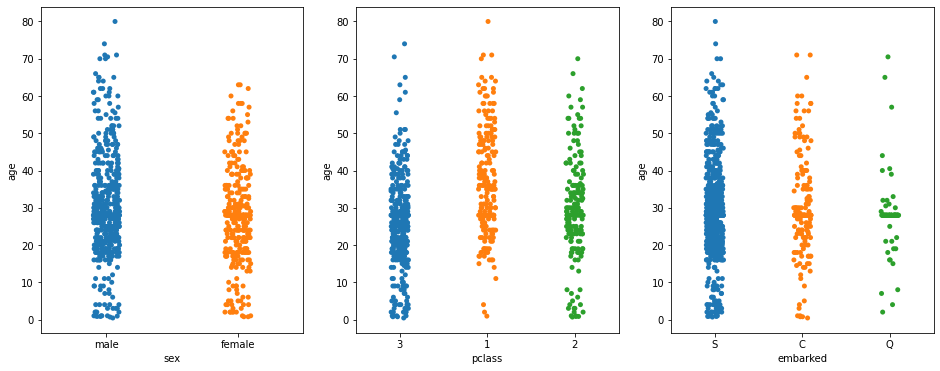

In [21]:
fig,ax = plt.subplots(1,3,figsize=(16,6))
sns.stripplot(data = df, x ='sex',y = 'age',ax = ax[0])
sns.stripplot(data = df, x ='pclass',y = 'age',ax = ax[1])
sns.stripplot(data = df, x ='embarked',y = 'age',ax = ax[2])

<AxesSubplot:xlabel='embarked', ylabel='age'>

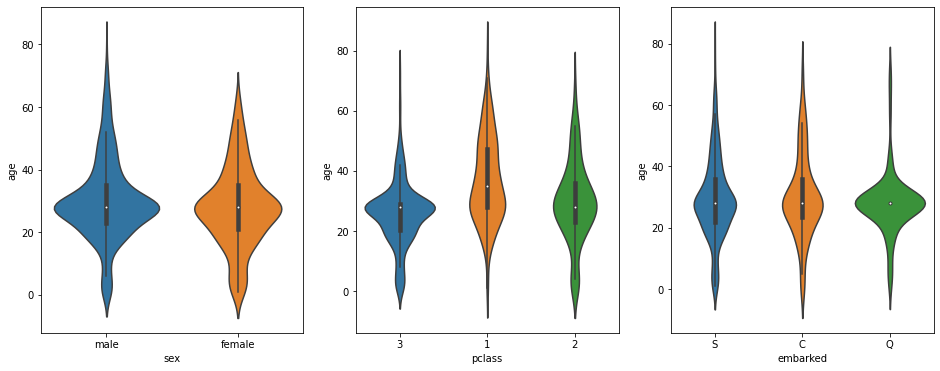

In [22]:
fig,ax = plt.subplots(1,3,figsize=(16,6))
sns.violinplot(data = df, x ='sex',y = 'age',ax = ax[0])
sns.violinplot(data = df, x ='pclass',y = 'age',ax = ax[1])
sns.violinplot(data = df, x ='embarked',y = 'age',ax = ax[2])

### Survival Inspection

In [23]:
# sex     survived
# female  1           0.74
#         0           0.25
    
# male    0           0.81
#         1           0.18

- common_norm = False normalized each hue in its own category. Notice that different color bars add up up 100%

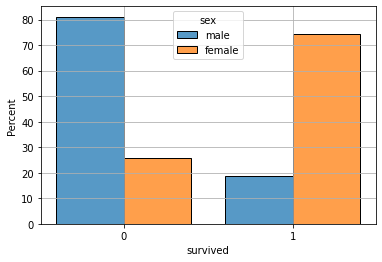

In [24]:
#varifies the result above
sns.histplot(data = df, x = 'survived', hue = 'sex', multiple="dodge",
                  stat = 'percent', shrink = 0.8,common_norm = False)
plt.grid()

In [25]:
# pclass  survived
# 1       1           0.62
#         0           0.37
        
# 2       0           0.52
#         1           0.47
        
# 3       0           0.75
#         1           0.24

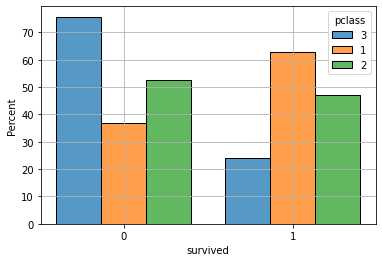

In [26]:
#confirms the results above
sns.histplot(data = df, x = 'survived', hue = 'pclass', multiple="dodge",
                  stat = 'percent', shrink = 0.8,common_norm = False)
plt.grid()

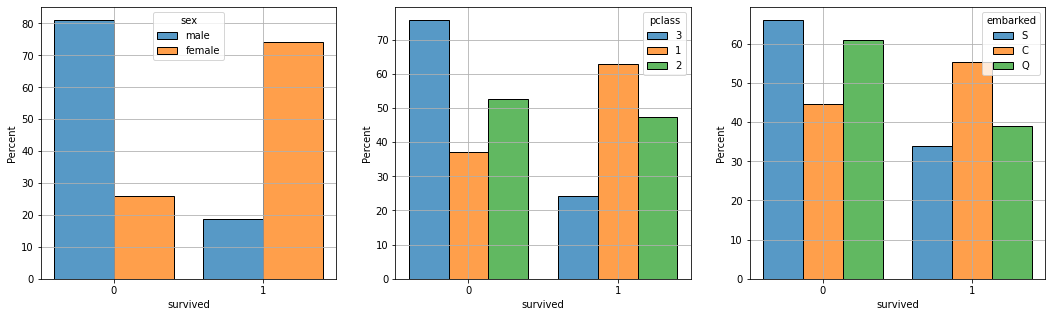

In [27]:
#Put them together
fig,ax = plt.subplots(1,3,figsize=(18, 5))

sns.histplot(x = df['survived'], hue = df['sex'], multiple="dodge", 
                  stat = 'percent', shrink = 0.8, common_norm=False,ax=ax[0])

sns.histplot(x = df['survived'], hue = df['pclass'], multiple="dodge", 
                  stat = 'percent', shrink = 0.8, common_norm=False,ax=ax[1])

sns.histplot(x = df['survived'], hue = df['embarked'], multiple="dodge", 
                  stat = 'percent', shrink = 0.8, common_norm=False,ax=ax[2])
ax[0].grid()
ax[1].grid()
ax[2].grid()
plt.show()

<AxesSubplot:xlabel='survived', ylabel='age'>

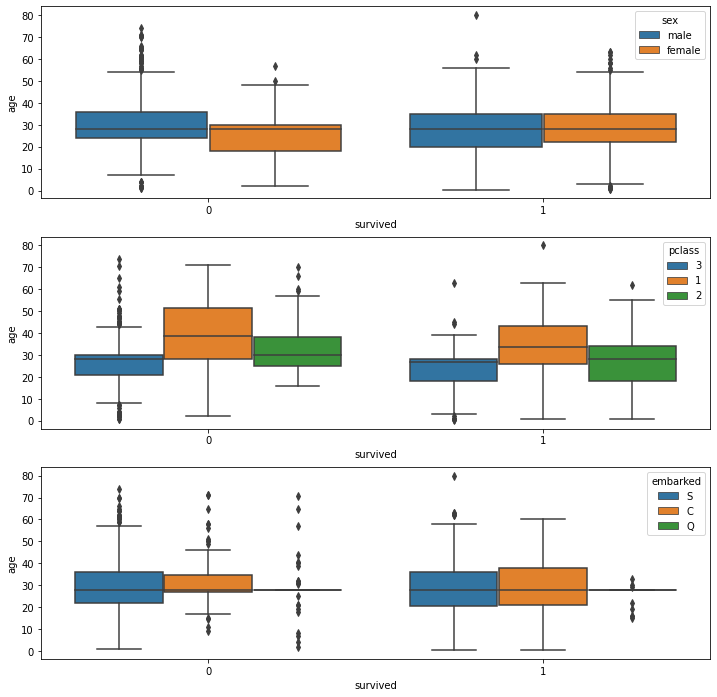

In [28]:
#another way of looking at the same data
fig,ax = plt.subplots(3,1,figsize=(12,12))
sns.boxplot(data = df, x = 'survived',y = 'age' ,hue='sex',ax =ax[0])
sns.boxplot(data = df, x = 'survived',y = 'age' ,hue='pclass',ax = ax[1])
sns.boxplot(data = df, x = 'survived',y = 'age' ,hue='embarked',ax = ax[2])

### Correlation Matrix

In [29]:
df_copy = df.copy()
df_copy.drop(columns = ['sibsp','parch', 'ticket','fare','name'],inplace=True)
df_dummy = pd.get_dummies(data=df_copy,columns=['survived','pclass','sex'])

In [30]:
df_dummy

,age,embarked,survived_0,survived_1,pclass_1,pclass_2,pclass_3,sex_female,sex_male
0,22.0,S,1,0,0,0,1,0,1
1,38.0,C,0,1,1,0,0,1,0
2,26.0,S,0,1,0,0,1,1,0
3,35.0,S,0,1,1,0,0,1,0
4,35.0,S,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.0,S,1,0,0,1,0,0,1
887,19.0,S,0,1,1,0,0,1,0
888,28.0,S,1,0,0,0,1,1,0
889,26.0,C,0,1,1,0,0,0,1


<AxesSubplot:>

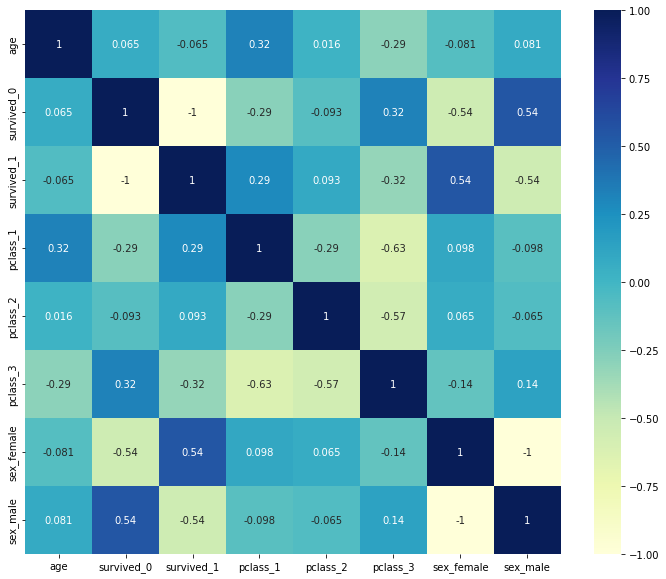

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(df_dummy.corr(),annot=True,cmap="YlGnBu")